In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
seed=123

In [29]:
class Bandit:
  def __init__(self, m):
    self.m = m
    self.mean = 0
    self.N = 0

  def pull(self):
    return np.random.randn() + self.m

  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x

In [30]:
def run_experiment(m1, m2, m3, m4, eps, N):
  bandits = [Bandit(m1), Bandit(m2), Bandit(m3), Bandit(m4)]

  data = np.empty(N)

  for i in range(N):
    # epsilon greedy
    p = np.random.random()
    if p < eps:
      j = np.random.choice(4)
    else:
      j = np.argmax([b.mean for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.plot(np.ones(N)*m4) 
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.mean)

  return cumulative_average

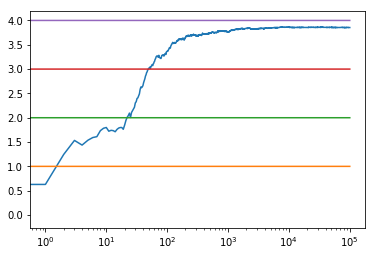

0.9930274465257449
2.0024303027048784
2.9809358735863865
4.004161566344065


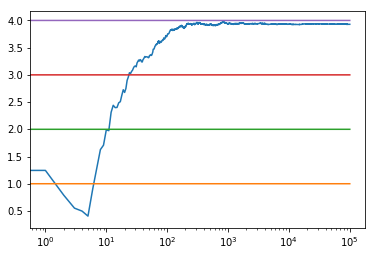

0.9852164000928498
2.0014560730330415
2.9855470642401594
4.004476057379575


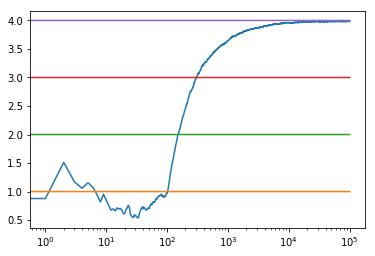

0.9983651505514263
2.0953078229644024
3.0072514643013184
4.0008193410788575


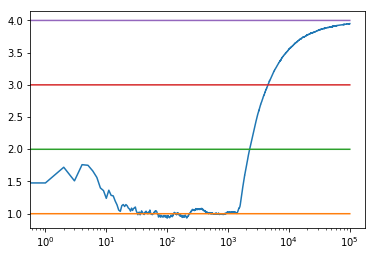

1.007435646526198
2.0971792622027
3.0854609672826694
3.997209594486088


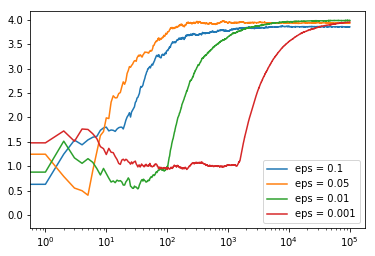

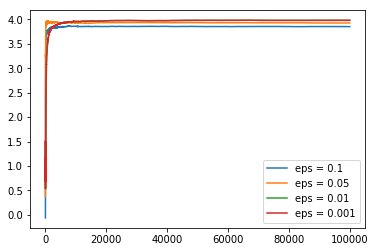

In [37]:
#experimenting with 4 bandits with eps 0.1, 0.05, 0.01 and 0.001

if __name__ == '__main__':
  c_1 = run_experiment(1.0, 2.0, 3.0, 4.0, 0.1, 100000)
  c_05 = run_experiment(1.0, 2.0, 3.0, 4.0, 0.05, 100000)
  c_01 = run_experiment(1.0, 2.0, 3.0, 4.0, 0.01, 100000)
  c_001 = run_experiment(1.0, 2.0, 3.0, 4.0, 0.001, 100000)
    
  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.plot(c_001, label='eps = 0.001')  
  plt.legend()
  plt.xscale('log')
  plt.show()


  # linear plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.plot(c_01, label='eps = 0.001')  
  plt.legend()
  plt.show()
